<a href="https://colab.research.google.com/github/tamimmahmudkhan/Bangla-Sign-Language-Recognition-With-2d-CNN/blob/main/BanglaSignLanguageCustomCNN_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/TS/Downloads/BanglaSignLanguage/Train'
valid_path = 'C:/Users/TS/Downloads/BanglaSignLanguage/Test'

In [ ]:
# useful for getting number of output classes
folders = glob('C:/Users/TS/Downloads/BanglaSignLanguage/Train/*')

In [ ]:
folders

['C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ca',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\cha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ga',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\gha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ja',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\jha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\ka',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\kha',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\neo',
 'C:/Users/TS/Downloads/BanglaSignLanguage/Train\\umo']

In [ ]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
import tensorflow as tf

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
###
# Part 2 - Building the CNN

# Initialising the CNN
##model = tf.keras.models.Sequential()

# Step 1 - Convolution
##model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[224, 224, 3]))

# Step 2 - Pooling
##model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
##model.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
##model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
##model.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
##model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
##model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  #loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/TS/Downloads/BanglaSignLanguage/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1213 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('C:/Users/TS/Downloads/BanglaSignLanguage/Test/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 200 images belonging to 10 classes.


In [ ]:
# Part 3 - Training the CNN

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/20


C:\Users\TS\AppData\Local\Temp/ipykernel_11336/2737970824.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


76/76 [==============================] - 56s 735ms/step - loss: 2.3958 - accuracy: 0.1657 - val_loss: 2.1841 - val_accuracy: 0.1900
Epoch 2/20
76/76 [==============================] - 53s 703ms/step - loss: 1.9404 - accuracy: 0.3223 - val_loss: 2.0594 - val_accuracy: 0.2350
Epoch 3/20
76/76 [==============================] - 50s 654ms/step - loss: 1.5491 - accuracy: 0.4905 - val_loss: 1.9295 - val_accuracy: 0.3350
Epoch 4/20
76/76 [==============================] - 48s 629ms/step - loss: 1.2649 - accuracy: 0.5763 - val_loss: 1.8773 - val_accuracy: 0.3650
Epoch 5/20
76/76 [==============================] - 50s 661ms/step - loss: 1.0188 - accuracy: 0.6752 - val_loss: 1.8961 - val_accuracy: 0.3900
Epoch 6/20
76/76 [==============================] - 49s 635ms/step - loss: 0.8693 - accuracy: 0.7139 - val_loss: 1.7735 - val_accuracy: 0.4550
Epoch 7/20
76/76 [==============================] - 48s 627ms/step - loss: 0.6978 - accuracy: 0.7650 - val_loss: 2.1024 - val_accuracy: 0.3900
Epoch 8/20

In [ ]:
#saving model
from tensorflow.keras.models import load_model
model.save('model_customCnn_BanglaSignLanguage_2CustomCNN_5epoch_datasetv2_.h5')

In [ ]:
y_pred=model.predict(test_set)

In [ ]:
y_pred

array([[0.1914137 , 0.05299685, 0.03484558, ..., 0.12525544, 0.10657158,
        0.12538928],
       [0.06207502, 0.00469071, 0.01811403, ..., 0.09646739, 0.10319152,
        0.01554174],
       [0.02947991, 0.01468385, 0.07802661, ..., 0.11208502, 0.45525545,
        0.04229573],
       ...,
       [0.08473483, 0.06384698, 0.04247794, ..., 0.17020042, 0.12629275,
        0.06939717],
       [0.10970195, 0.07039234, 0.0145285 , ..., 0.10512408, 0.05163644,
        0.01295553],
       [0.08332882, 0.04741637, 0.02377321, ..., 0.17582285, 0.13348359,
        0.05910842]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([0, 5, 8, 4, 0, 5, 8, 7, 7, 9, 6, 1, 7, 7, 6, 6, 5, 7, 7, 6, 6, 8,
       3, 8, 7, 7, 7, 5, 8, 0, 4, 7, 0, 7, 5, 0, 7, 4, 9, 7, 5, 7, 4, 0,
       1, 7, 2, 5, 4, 8, 7, 7, 2, 7, 8, 6, 3, 8, 7, 4, 7, 7, 2, 4, 4, 7,
       2, 1, 7, 5, 7, 7, 6, 0, 6, 7, 1, 5, 7, 7, 8, 5, 7, 1, 4, 1, 2, 3,
       7, 3, 7, 0, 7, 3, 6, 5, 7, 3, 8, 4, 3, 6, 3, 5, 7, 4, 7, 4, 4, 8,
       4, 7, 6, 7, 4, 5, 4, 0, 7, 7, 7, 7, 7, 5, 7, 2, 6, 5, 7, 7, 6, 7,
       6, 7, 0, 7, 6, 4, 6, 6, 5, 7, 6, 7, 7, 1, 0, 4, 1, 5, 7, 3, 7, 7,
       7, 6, 3, 7, 7, 6, 2, 2, 7, 1, 5, 9, 7, 7, 7, 1, 7, 7, 1, 5, 3, 0,
       6, 7, 7, 7, 0, 7, 7, 6, 7, 7, 4, 1, 3, 7, 4, 0, 2, 6, 7, 8, 5, 7,
       5, 7], dtype=int64)

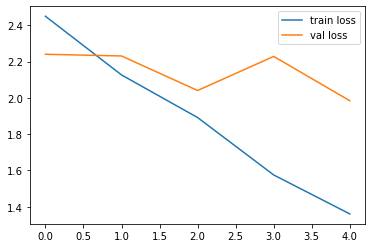

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

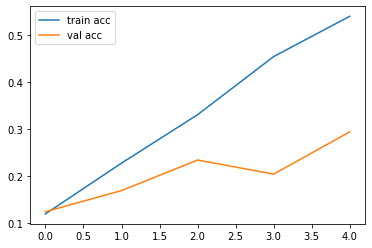

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
##import tensorflow as tf

##from tensorflow.keras.models import load_model
##from tensorflow.keras.preprocessing import image

##model.save('model_vgg16_cell_v2.h5')